In [1]:
from inference import Inference_model

segmentor = Inference_model('../asbest/asbest_segmentation_b3_v1.2.pth')

In [2]:
import cv2 
img = cv2.imread('/home/vasily/datasets/asbestos/stones/161220/ManualGeneralImage_10_01_26.bmp', cv2.IMREAD_UNCHANGED)
asb = segmentor.predict(img)

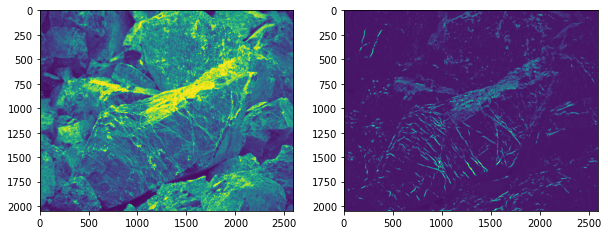

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(asb)